In [66]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from textblob import Word, TextBlob
from warnings import filterwarnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier



In [24]:
df=pd.read_excel("datasets/amazon.xlsx")

In [25]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [26]:
df["Review"]

0                                           Happy with it
1       Good quality material however the panels are m...
2       Product was fun for bedroom windows.<br />Imag...
3        Lo unico que me gustaria es que sean un poco ...
4       Great bang for the buck I can't believe the qu...
                              ...                        
5606    Great product for reasonable money.  Delivered...
5607             Color is way off and panels do not match
5608    These are great for my studio as they compleme...
5609    Brought out the beauty in kids room. They love...
5610    Very cute curtains in my sons room! Thick enou...
Name: Review, Length: 5611, dtype: object

In [27]:
df["Review"]=df["Review"].str.lower()
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [28]:
df["Review"]=df["Review"].str.replace('[^\w\s]','',regex=True)
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [29]:
df["Review"]=df["Review"].str.replace('\d','',regex=True)
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [30]:
sw=stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
df["Review"]=df["Review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Review"]

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [33]:
#rarewords
temp_df=pd.Series(' '.join(df['Review']).split()).value_counts()
drops=temp_df[-1000:]
drops
df['Review']= df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [34]:
#lemmatization
df['Review'] = df['Review'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
df['Review']

0                                                   happy
1          good quality material however panel mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [40]:
#Kelime frekansları hesaplanması
tf=df['Review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns=["words","tf"]
tf.sort_values("tf", ascending=False)

,words,tf
66,curtain,2588.00
42,look,1531.00
120,love,1453.00
104,room,1129.00
166,like,1053.00
...,...,...
2876,unwuiness,1.00
2878,enters,1.00
2879,soonbrlittle,1.00
2880,isbrbrlove,1.00


In [39]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

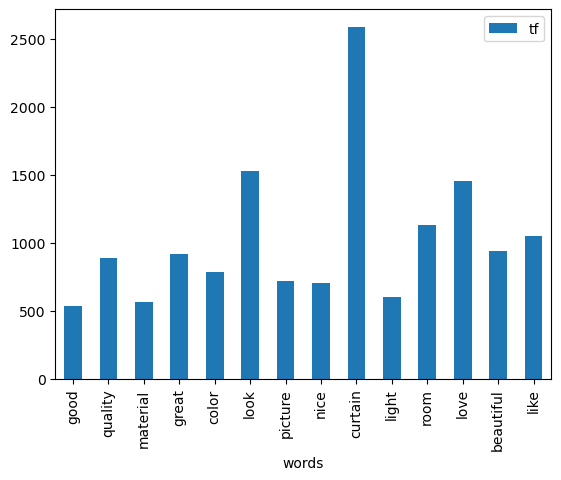

In [43]:
tf[tf["tf"]>500].plot.bar(x="words", y="tf")
plt.show()

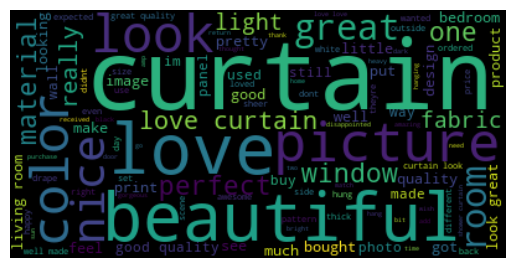

In [45]:
#word cloud
text= " ".join(i for i in df.Review)
wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
sia=SentimentIntensityAnalyzer()
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.91
8   0.00
9   0.71
Name: Review, dtype: float64

In [49]:
df["polarity_score"] = df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()

sentiment_label
pos    4764
neg     847
Name: count, dtype: int64

In [52]:
df["sentiment_label"]=LabelEncoder().fit_transform(df["sentiment_label"])
df["sentiment_label"]

0       1
1       1
2       1
3       0
4       1
       ..
5606    1
5607    0
5608    1
5609    1
5610    1
Name: sentiment_label, Length: 5611, dtype: int32

In [57]:
train_x, test_x, train_y, test_y=train_test_split(df["Review"],
                                                  df["sentiment_label"],
                                                  random_state=42)

In [58]:
#TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [69]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred=log_model.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()


              precision    recall  f1-score   support

           0       0.33      0.90      0.49        82
           1       0.99      0.89      0.94      1321

    accuracy                           0.89      1403
   macro avg       0.66      0.89      0.71      1403
weighted avg       0.95      0.89      0.91      1403



0.8546034570411795

In [68]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
y_pred=rf_model.predict(x_test_tf_idf_word)
print(classification_report(y_pred, test_y))
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

              precision    recall  f1-score   support

           0       0.56      0.78      0.65       161
           1       0.97      0.92      0.94      1242

    accuracy                           0.90      1403
   macro avg       0.77      0.85      0.80      1403
weighted avg       0.92      0.90      0.91      1403



0.8888256227758007